The problem statement
- The dataset contain several features and base of these features, we have to predict
- whether a person was vaccinated with H1N1 Vaccine or not vaccinated.
- The target is h1n1_vaccine column in the dataset

### Import libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score
from sklearn.linear_model import LogisticRegression

In [2]:
# load dataset
df = pd.read_csv("datasets/h1n1_vaccine_prediction.csv")

In [3]:
df.head().style.background_gradient(cmap='ocean')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.000000,0.000000,0
1,1,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,4.000000,2.000000,4.000000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.000000,0.000000,0
2,2,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,1.000000,0.000000,0.000000,nan,3.000000,1.000000,1.000000,4.000000,1.000000,2.000000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.000000,0.000000,0
3,3,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,nan,3.000000,3.000000,5.000000,5.000000,4.000000,1.000000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.000000,0.000000,0
4,4,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,3.000000,3.000000,2.000000,3.000000,1.000000,4.000000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.000000,0.000000,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [6]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
# drop unique_id column
df.drop(['unique_id'],axis=1, inplace=True)

In [8]:
# check missing values
df.isna().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

- There are a lot of missing values and they needs to be treated
- Only ['age_bracket','race','sex','census_msa','h1n1_vaccine'] has no missing values

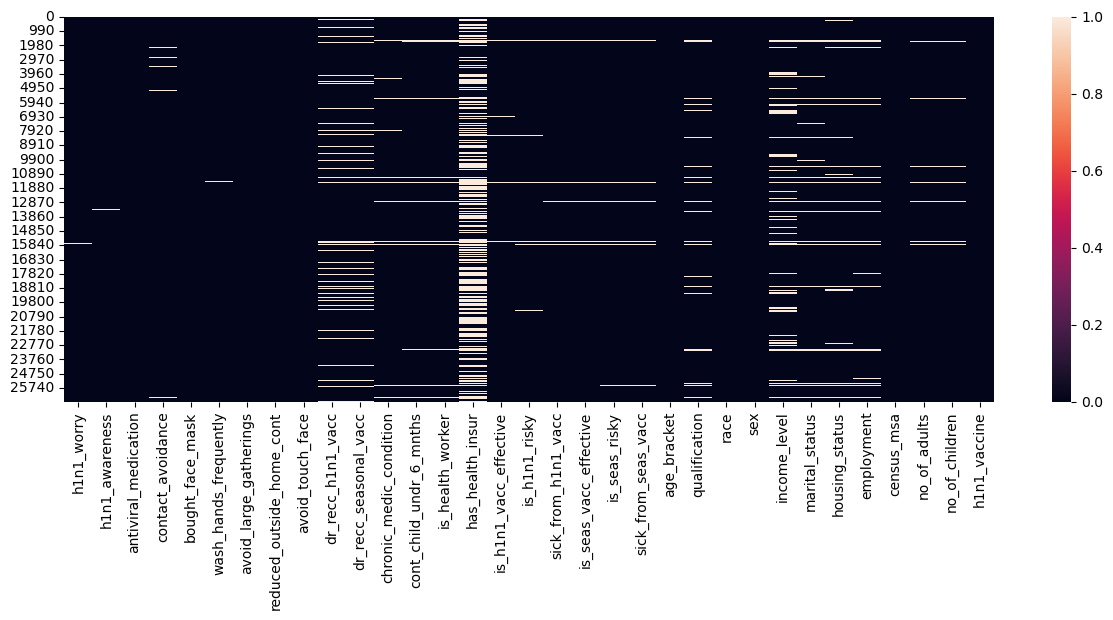

In [9]:
# visualize the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isna())
plt.show()

In [10]:
# check duplicates
duplicate = df.duplicated()
print(duplicate.sum())

4


In [11]:
df.describe().style.background_gradient(cmap='Blues')

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.000000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.358640,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.879720,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.479610,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.325300,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [12]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [13]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [14]:
# categorical columns
df[categorical_cols].sample(5)

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
11373,65+ Years,Some College,White,Female,NaN,Not Married,Own,Not in Labor Force,"MSA, Not Principle City"
23479,45 - 54 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City"
18495,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City"
7165,45 - 54 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
19974,55 - 64 Years,Some College,White,Male,"> $75,000",Married,Own,Employed,"MSA, Principle City"


In [15]:
# numerical columns
df[numerical_cols].sample(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
18586,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,4.0,4.0,2.0,4.0,4.0,4.0,0.0,0.0,1
24862,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,4.0,2.0,1.0,4.0,2.0,4.0,1.0,0.0,0
21603,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,0
17970,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,5.0,2.0,2.0,5.0,4.0,1.0,0.0,0.0,0
12946,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,0.0,0


### EDA

In [16]:
target_count =df['h1n1_vaccine'].value_counts()
target_count

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

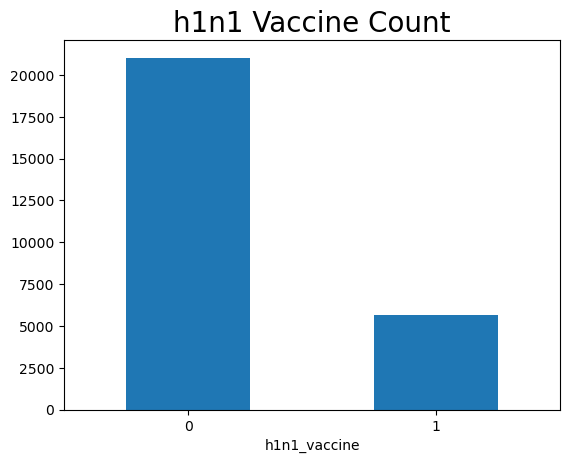

In [17]:
# Visualize the target column
target_count.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('h1n1 Vaccine Count',size=20)
plt.show()

- 0 == vaccinated
- 1 == not vaccinated

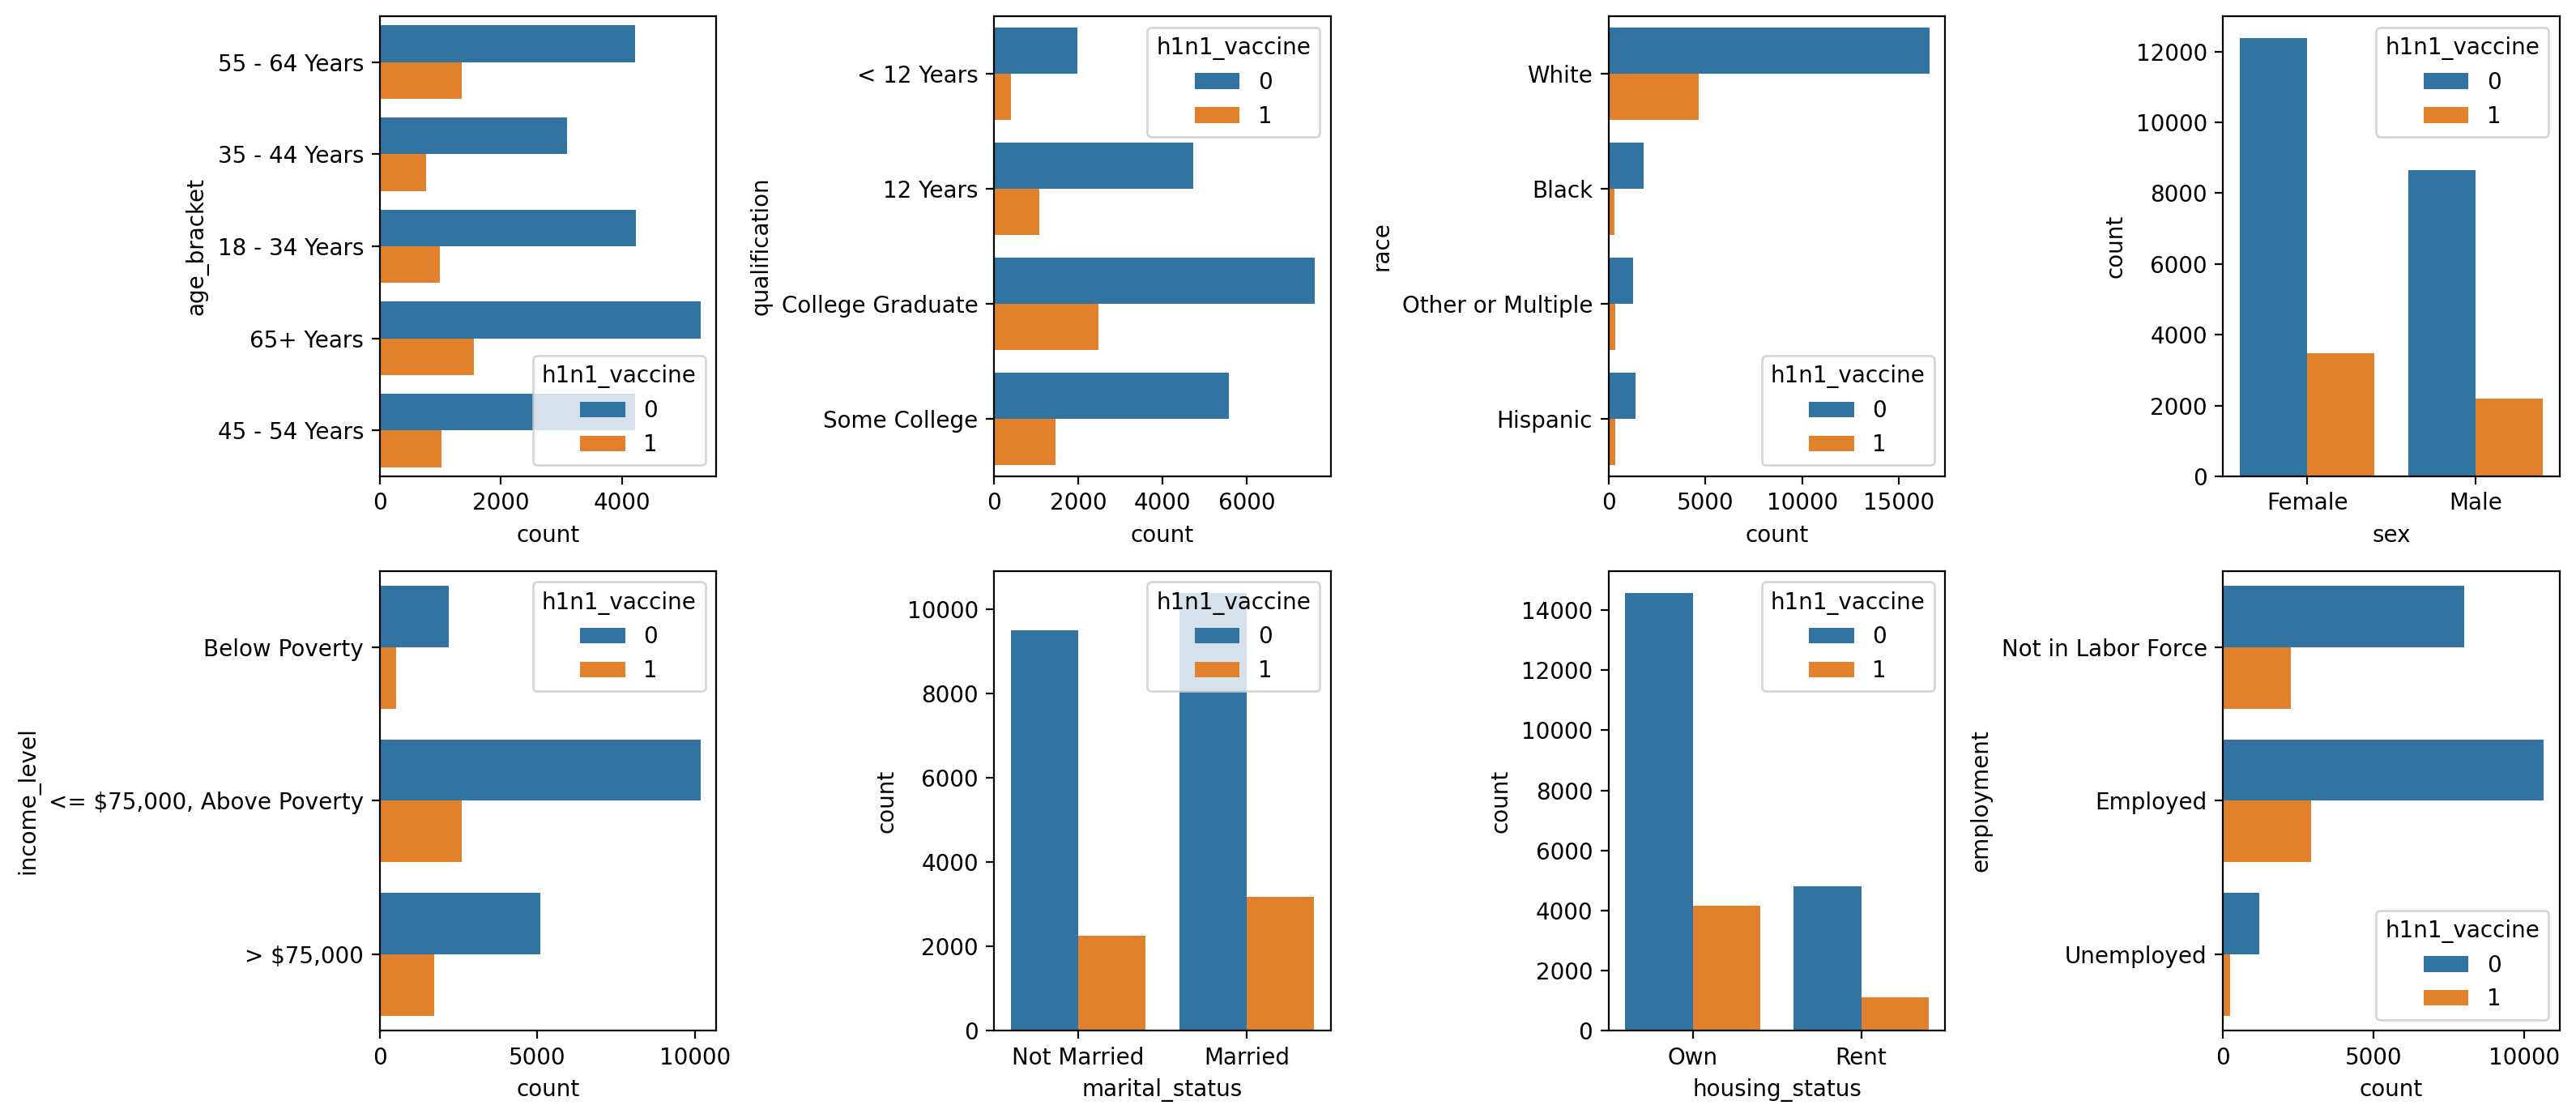

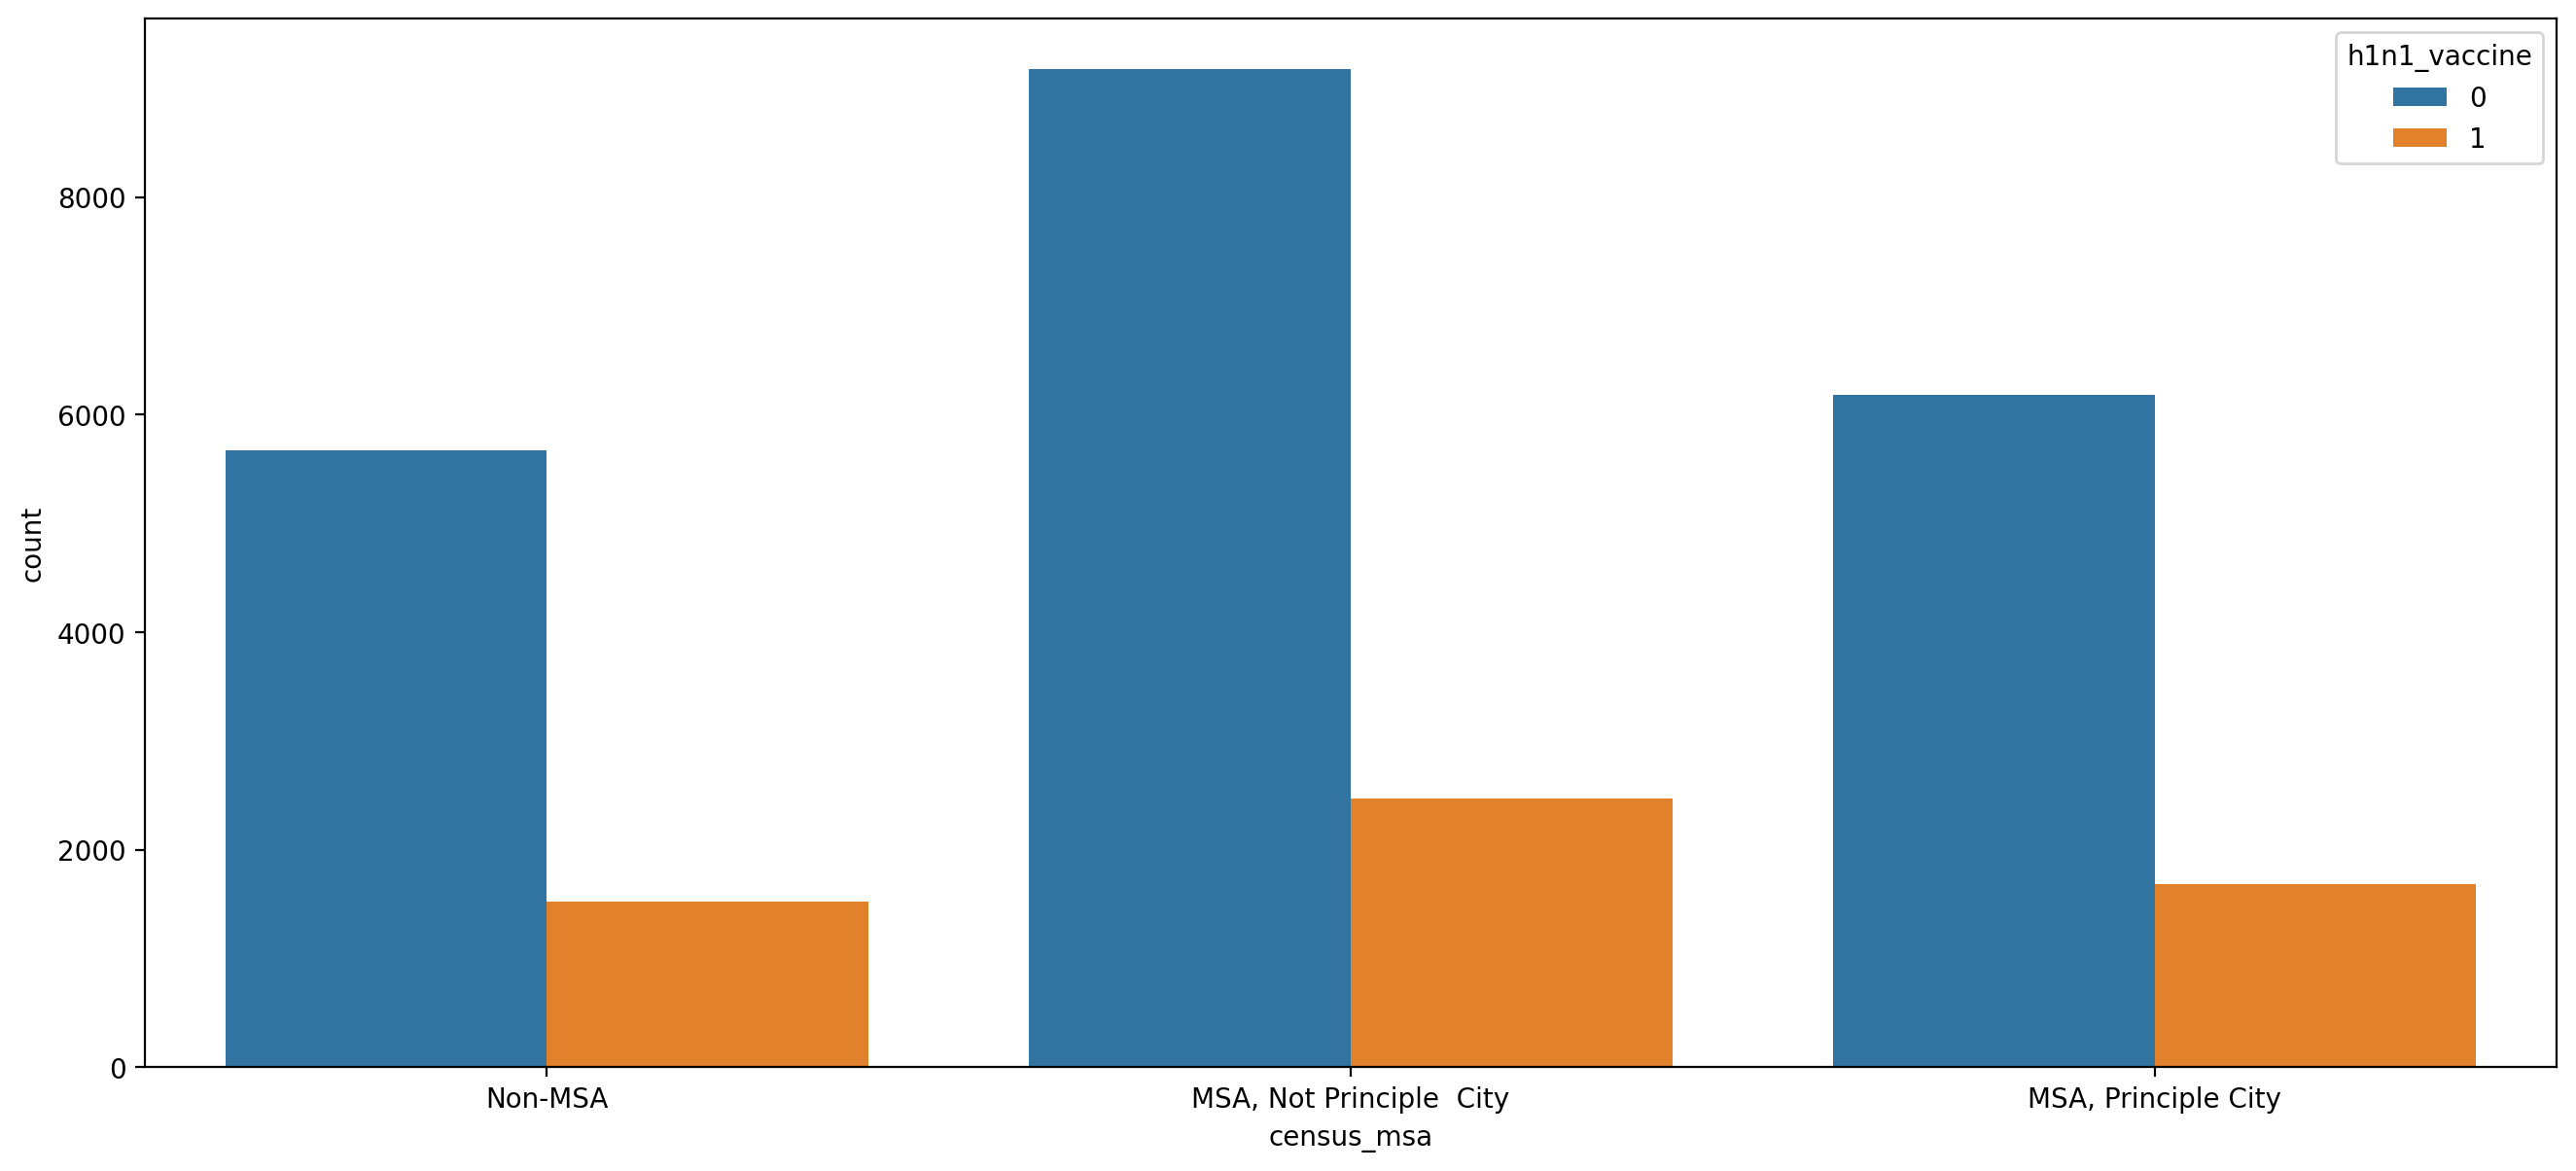

In [18]:
# visualize the categoricols columns
plt.rcParams['figure.figsize']=(16,7)
plt.rcParams['figure.dpi']= 200
fig, axs = plt.subplots(2,4)
sns.countplot(y=df['age_bracket'],data=df,hue='h1n1_vaccine',ax=axs[0,0])
sns.countplot(y=df['qualification'],data=df,hue='h1n1_vaccine',ax=axs[0,1] )
sns.countplot(y=df['race'],data=df,hue='h1n1_vaccine',ax=axs[0,2] )
sns.countplot(x=df['sex'],data=df,hue='h1n1_vaccine',ax=axs[0,3] )
sns.countplot(y=df['income_level'],data=df,hue='h1n1_vaccine',ax=axs[1,0])
sns.countplot(x=df['marital_status'],data=df,hue='h1n1_vaccine',ax=axs[1,1] )
sns.countplot(x=df['housing_status'],data=df,hue='h1n1_vaccine',ax=axs[1,2] )
sns.countplot(y=df['employment'],data=df,hue='h1n1_vaccine',ax=axs[1,3] )

plt.tight_layout()
plt.show()

plt.subplot(111)
sns.countplot(x=df['census_msa'],data=df,hue='h1n1_vaccine' )
plt.show()

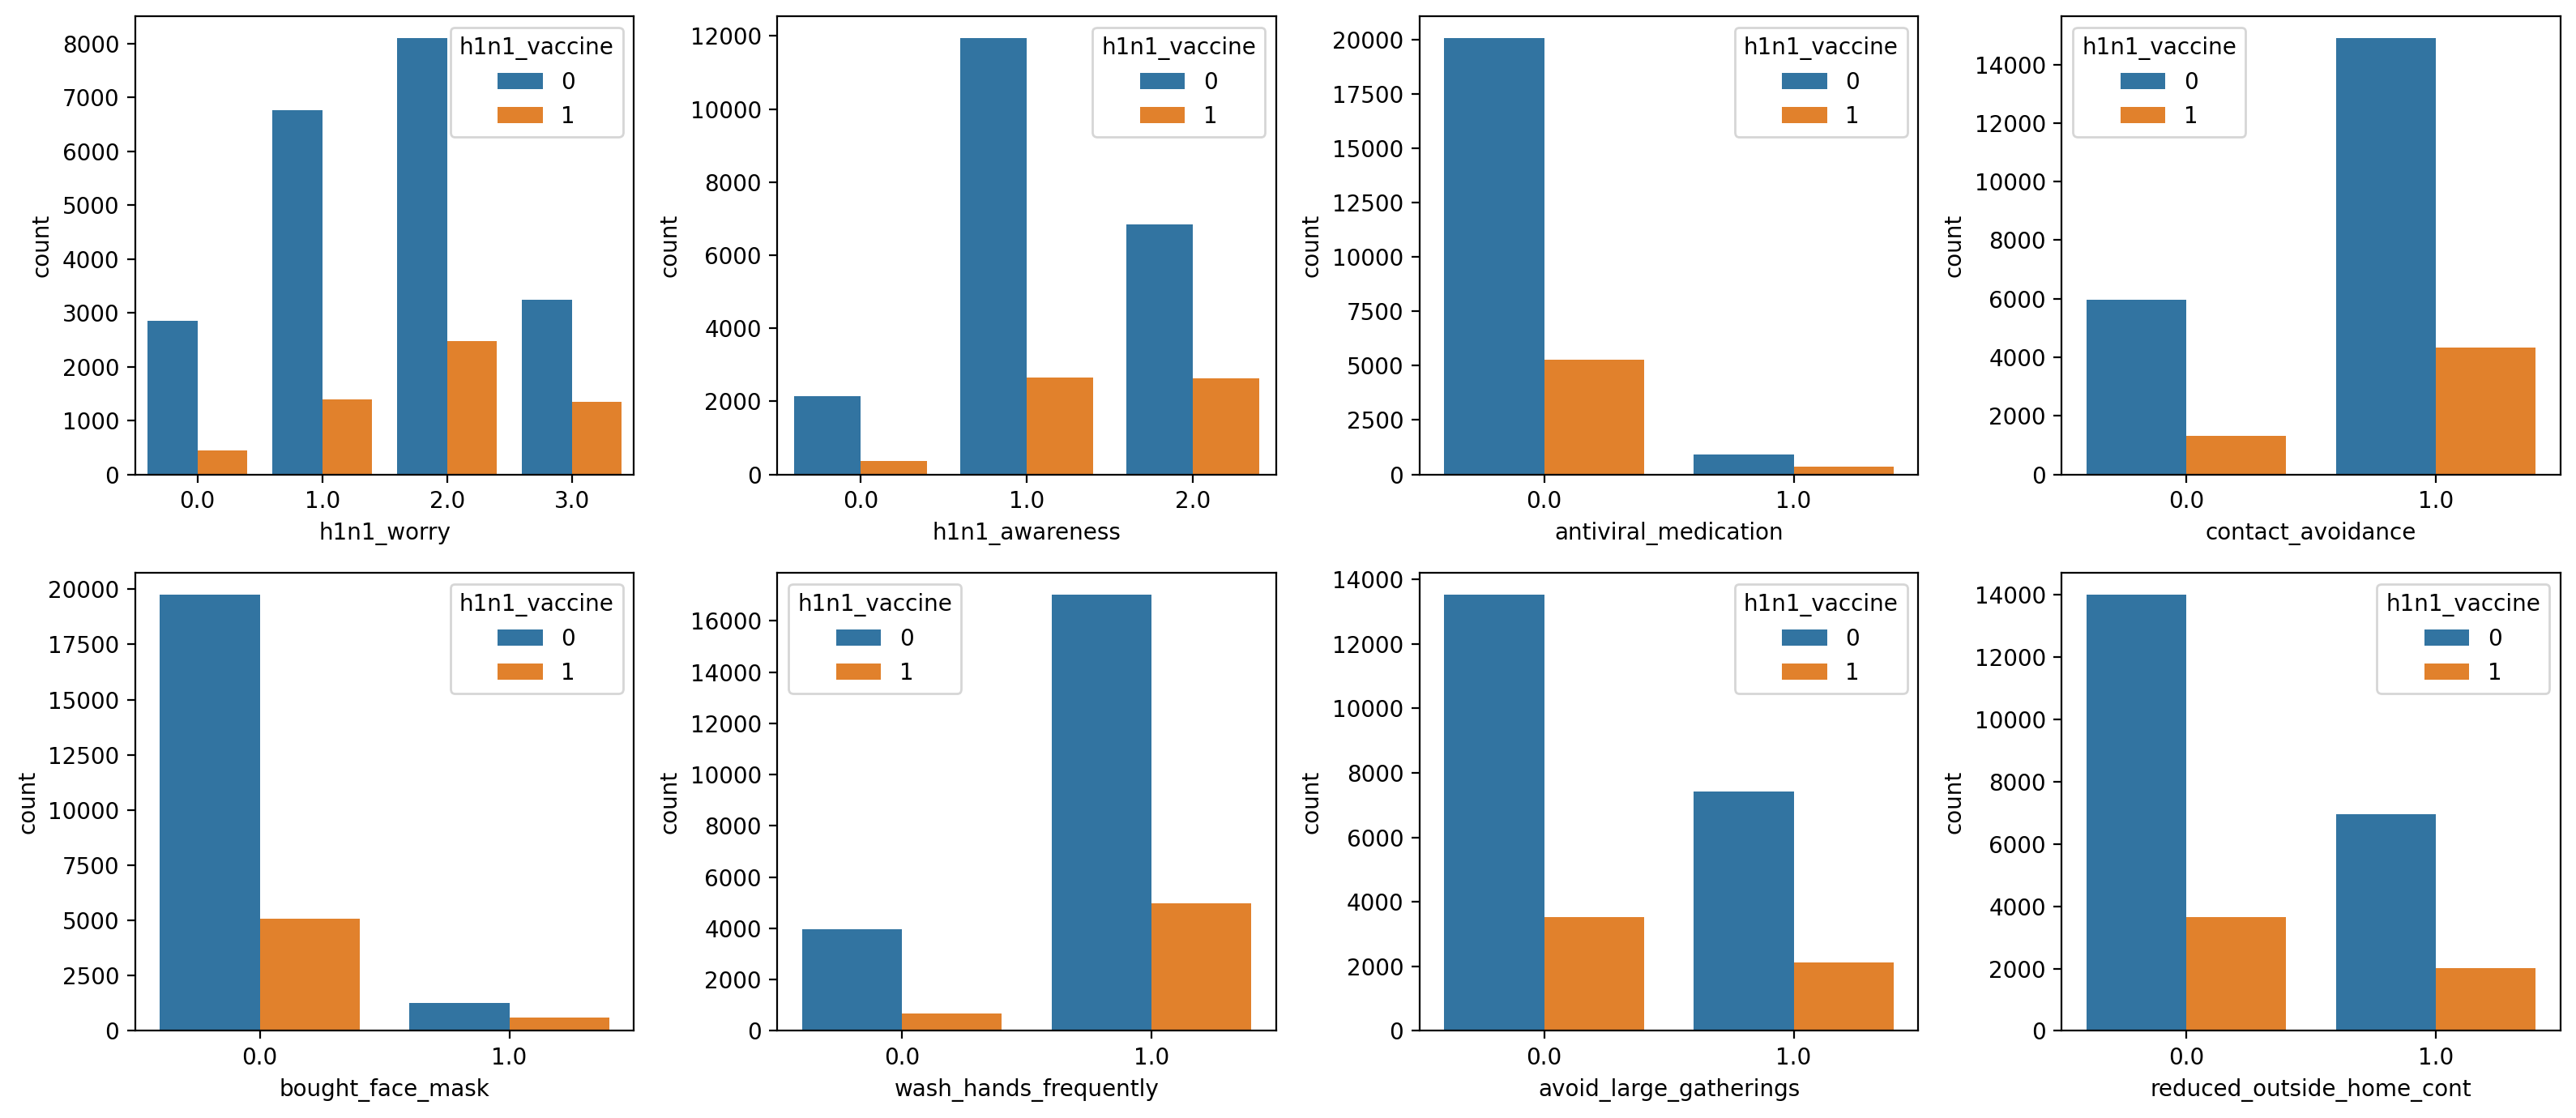

In [19]:
fig, axs = plt.subplots(2,4)
sns.countplot(x=df['h1n1_worry'],data=df,hue='h1n1_vaccine',ax=axs[0,0])
sns.countplot(x=df['h1n1_awareness'],data=df,hue='h1n1_vaccine',ax=axs[0,1] )
sns.countplot(x=df['antiviral_medication'],data=df,hue='h1n1_vaccine',ax=axs[0,2] )
sns.countplot(x=df['contact_avoidance'],data=df,hue='h1n1_vaccine',ax=axs[0,3] )
sns.countplot(x=df['bought_face_mask'],data=df,hue='h1n1_vaccine',ax=axs[1,0])
sns.countplot(x=df['wash_hands_frequently'],data=df,hue='h1n1_vaccine',ax=axs[1,1] )
sns.countplot(x=df['avoid_large_gatherings'],data=df,hue='h1n1_vaccine',ax=axs[1,2] )
sns.countplot(x=df['reduced_outside_home_cont'],data=df,hue='h1n1_vaccine',ax=axs[1,3] )

plt.tight_layout()
plt.show()

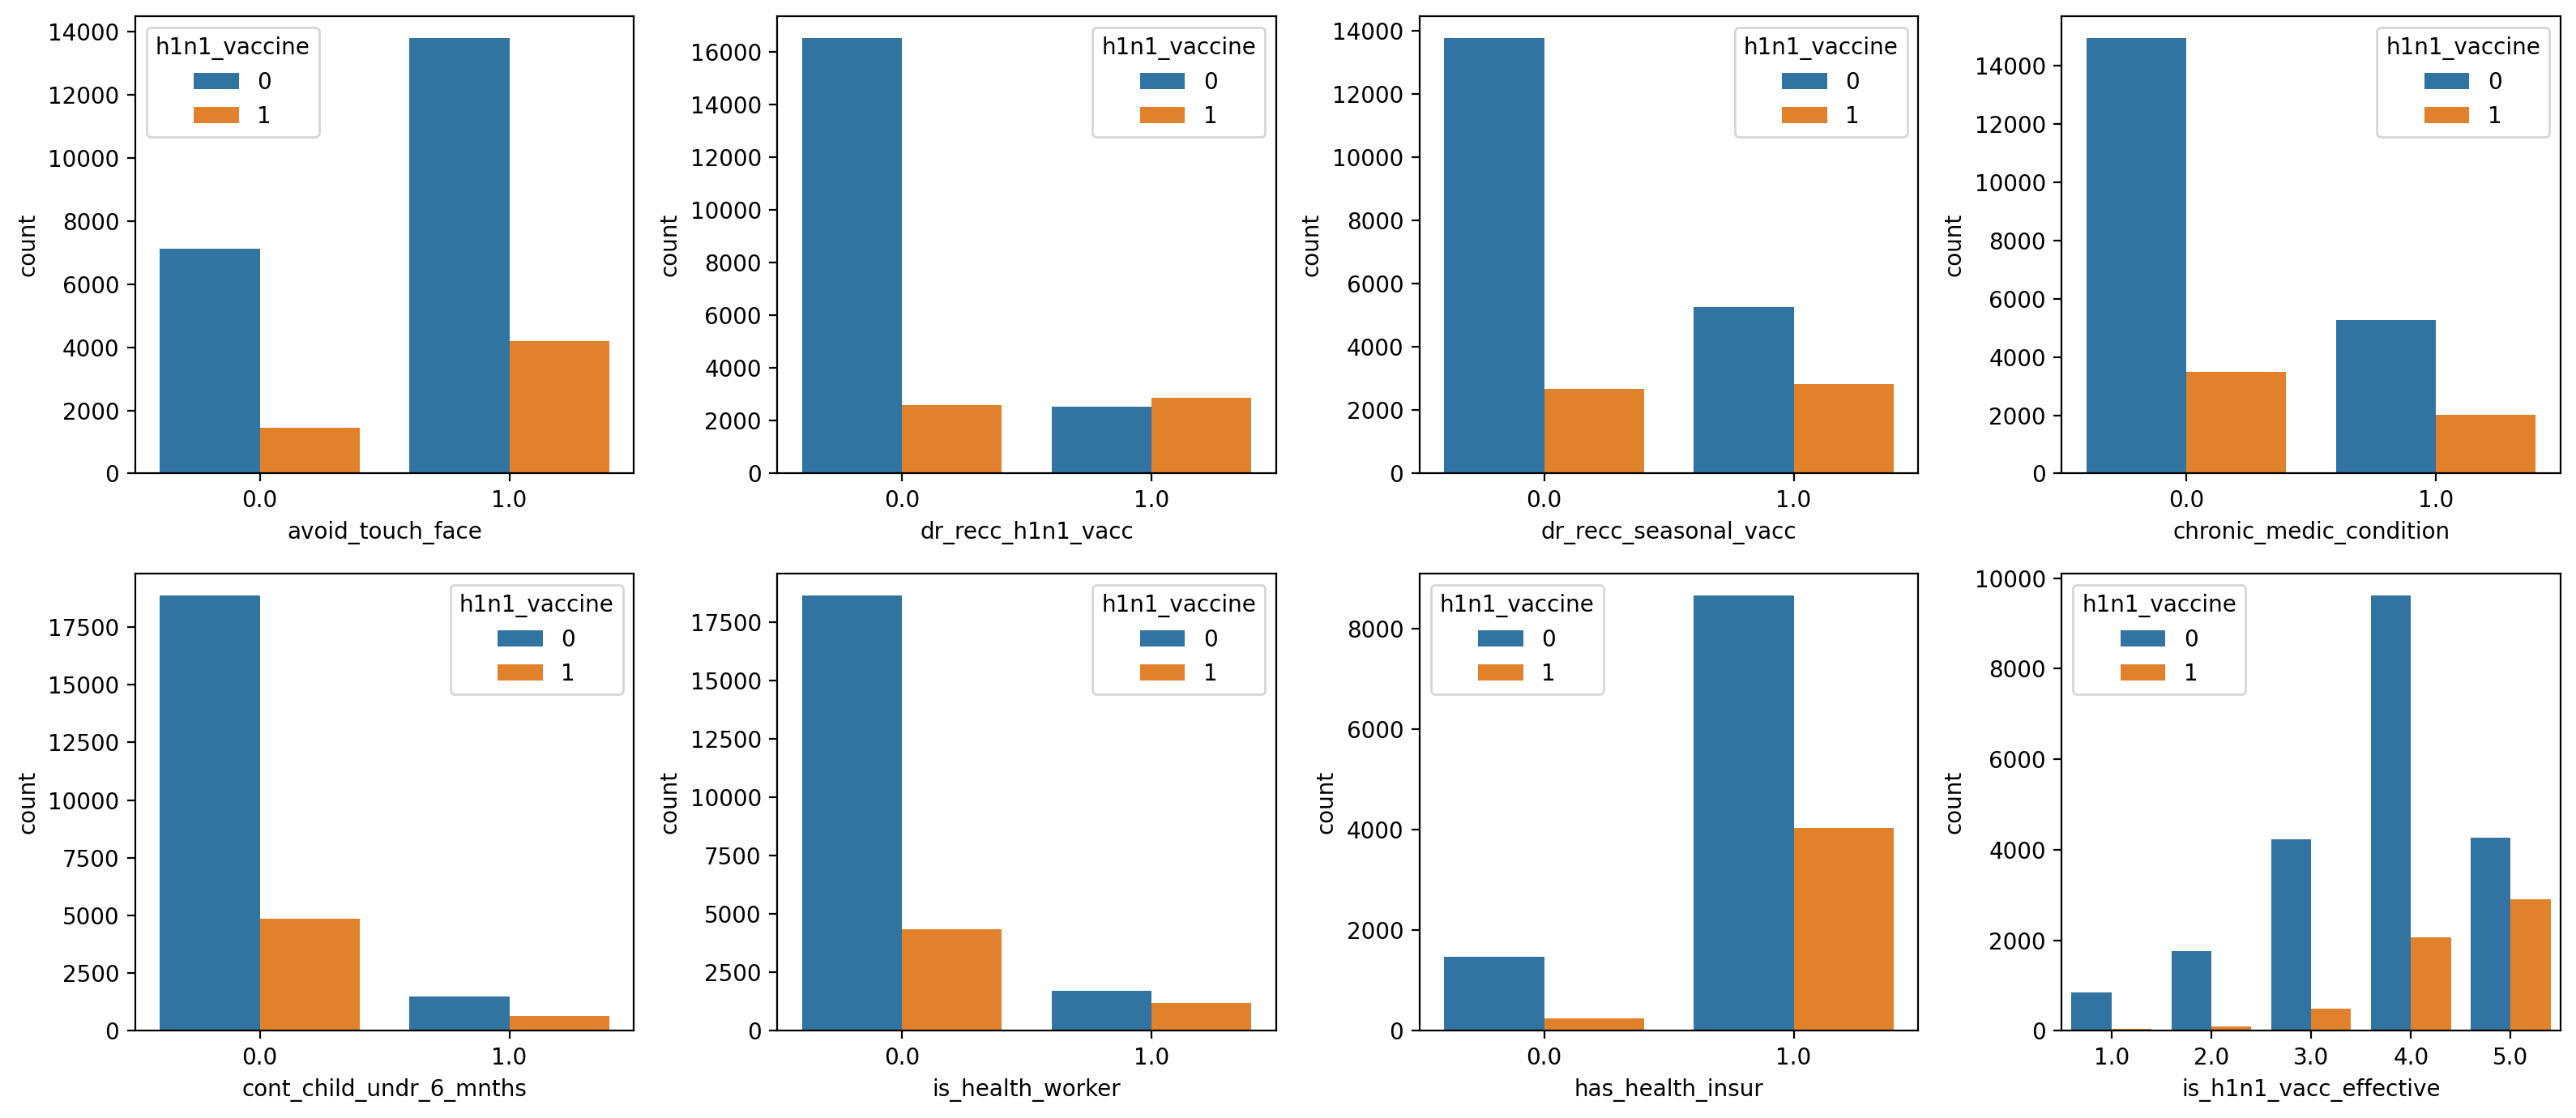

In [20]:
fig, axs = plt.subplots(2,4)
sns.countplot(x=df['avoid_touch_face'],data=df,hue='h1n1_vaccine',ax=axs[0,0])
sns.countplot(x=df['dr_recc_h1n1_vacc'],data=df,hue='h1n1_vaccine',ax=axs[0,1] )
sns.countplot(x=df['dr_recc_seasonal_vacc'],data=df,hue='h1n1_vaccine',ax=axs[0,2] )
sns.countplot(x=df['chronic_medic_condition'],data=df,hue='h1n1_vaccine',ax=axs[0,3] )
sns.countplot(x=df['cont_child_undr_6_mnths'],data=df,hue='h1n1_vaccine',ax=axs[1,0])
sns.countplot(x=df['is_health_worker'],data=df,hue='h1n1_vaccine',ax=axs[1,1] )
sns.countplot(x=df['has_health_insur'],data=df,hue='h1n1_vaccine',ax=axs[1,2] )
sns.countplot(x=df['is_h1n1_vacc_effective'],data=df,hue='h1n1_vaccine',ax=axs[1,3] )

plt.tight_layout()
plt.show()

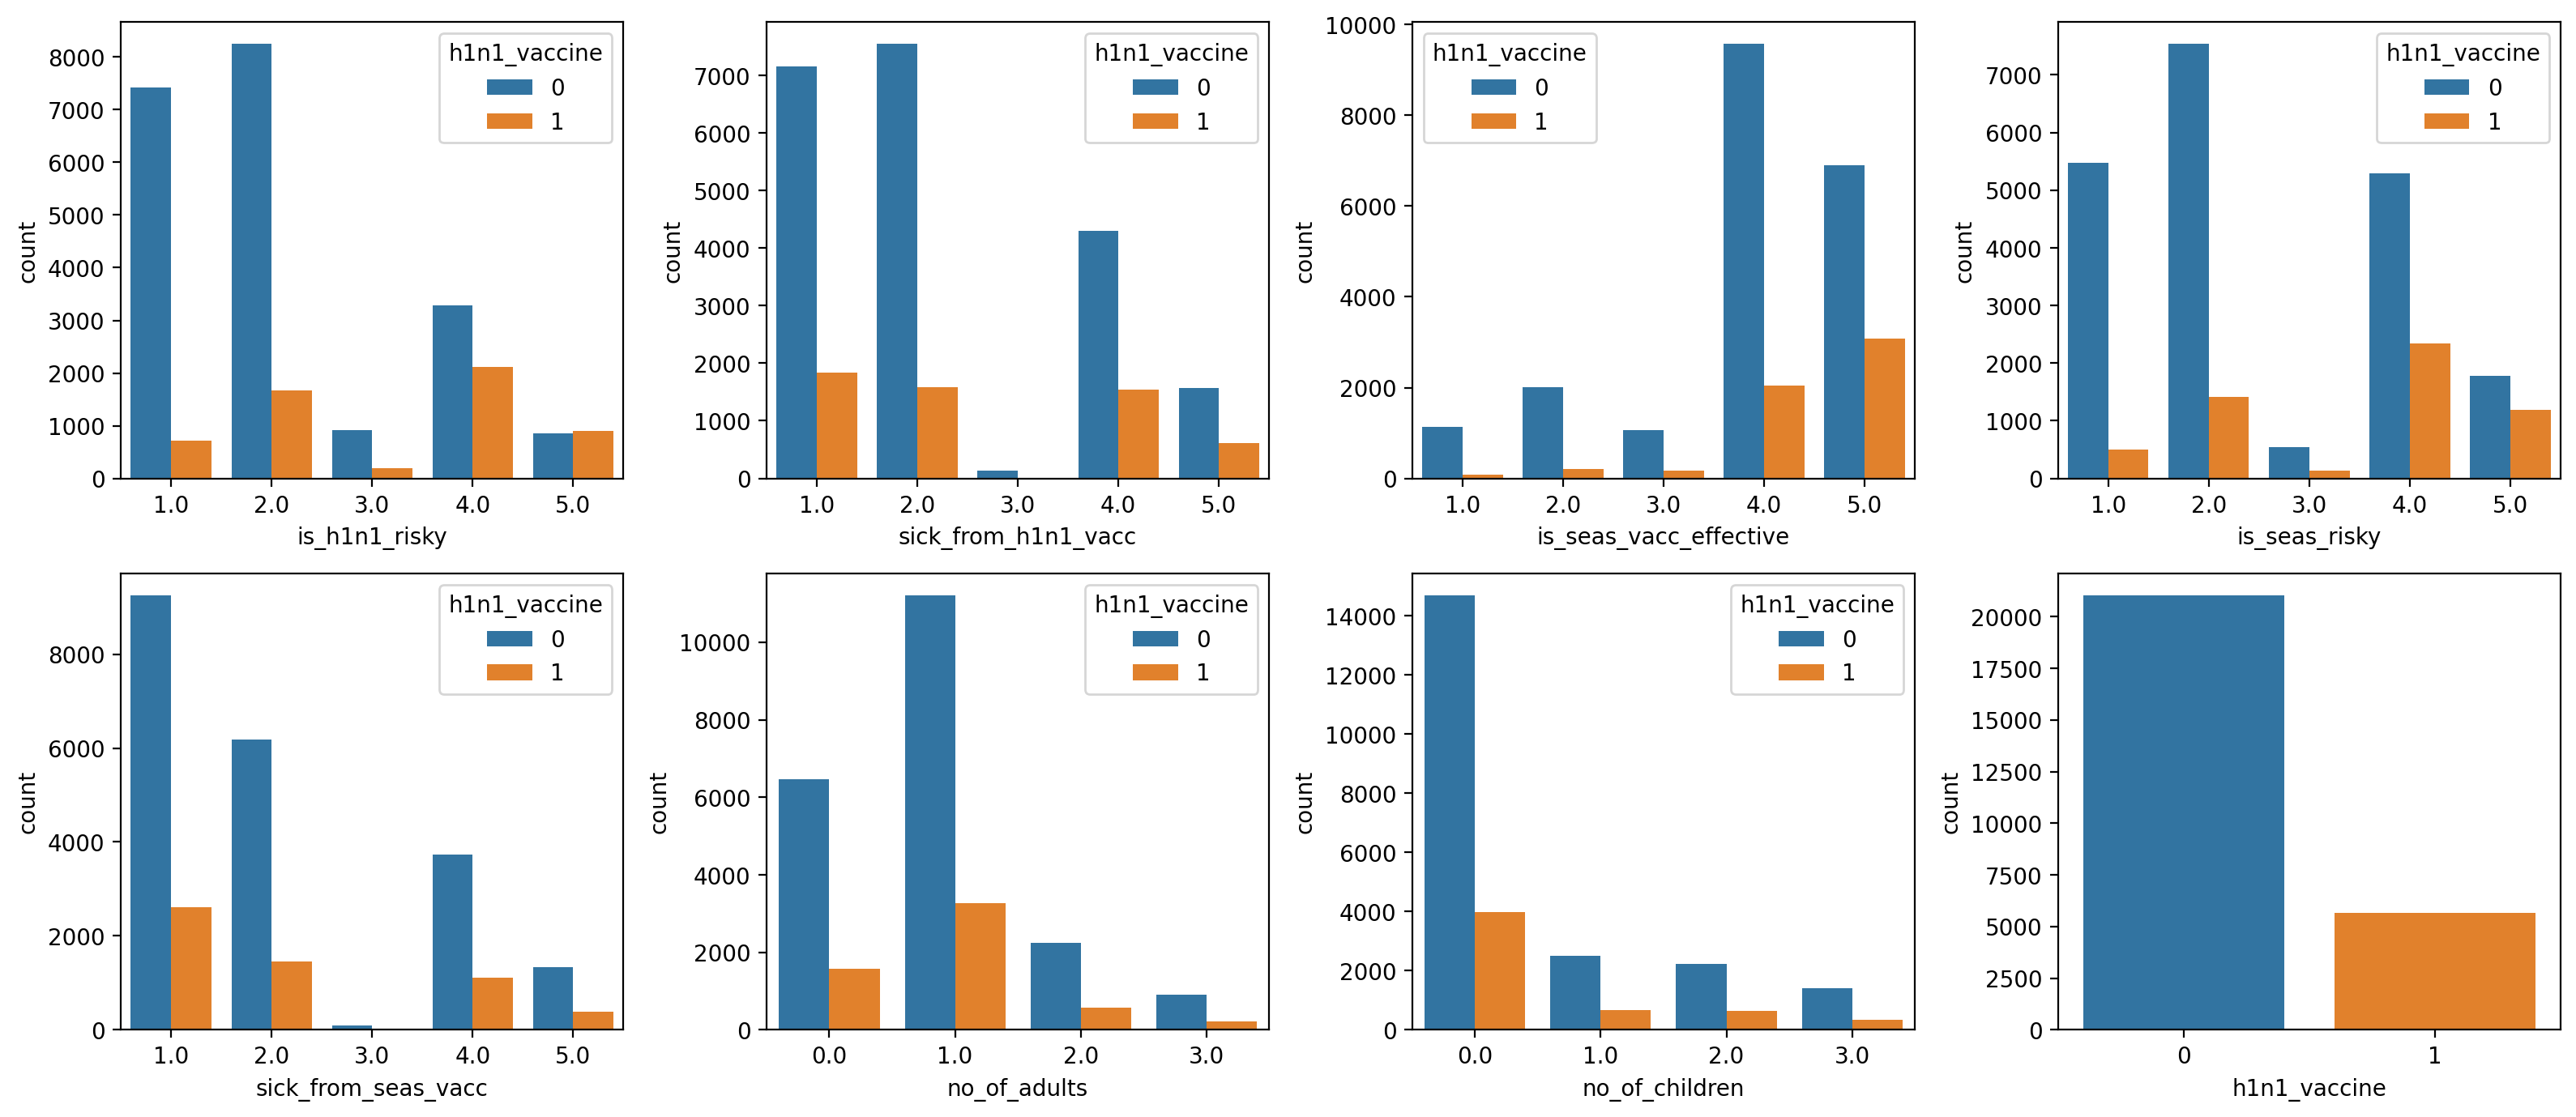

In [21]:

fig, axs = plt.subplots(2,4)
sns.countplot(x=df['is_h1n1_risky'],data=df,hue='h1n1_vaccine',ax=axs[0,0])
sns.countplot(x=df['sick_from_h1n1_vacc'],data=df,hue='h1n1_vaccine',ax=axs[0,1] )
sns.countplot(x=df['is_seas_vacc_effective'],data=df,hue='h1n1_vaccine',ax=axs[0,2] )
sns.countplot(x=df['is_seas_risky'],data=df,hue='h1n1_vaccine',ax=axs[0,3] )
sns.countplot(x=df['sick_from_seas_vacc'],data=df,hue='h1n1_vaccine',ax=axs[1,0])
sns.countplot(x=df['no_of_adults'],data=df,hue='h1n1_vaccine',ax=axs[1,1] )
sns.countplot(x=df['no_of_children'],data=df,hue='h1n1_vaccine',ax=axs[1,2] )
sns.countplot(x=df['h1n1_vaccine'],data=df,ax=axs[1,3] )

plt.tight_layout()
plt.show()

<Axes: >

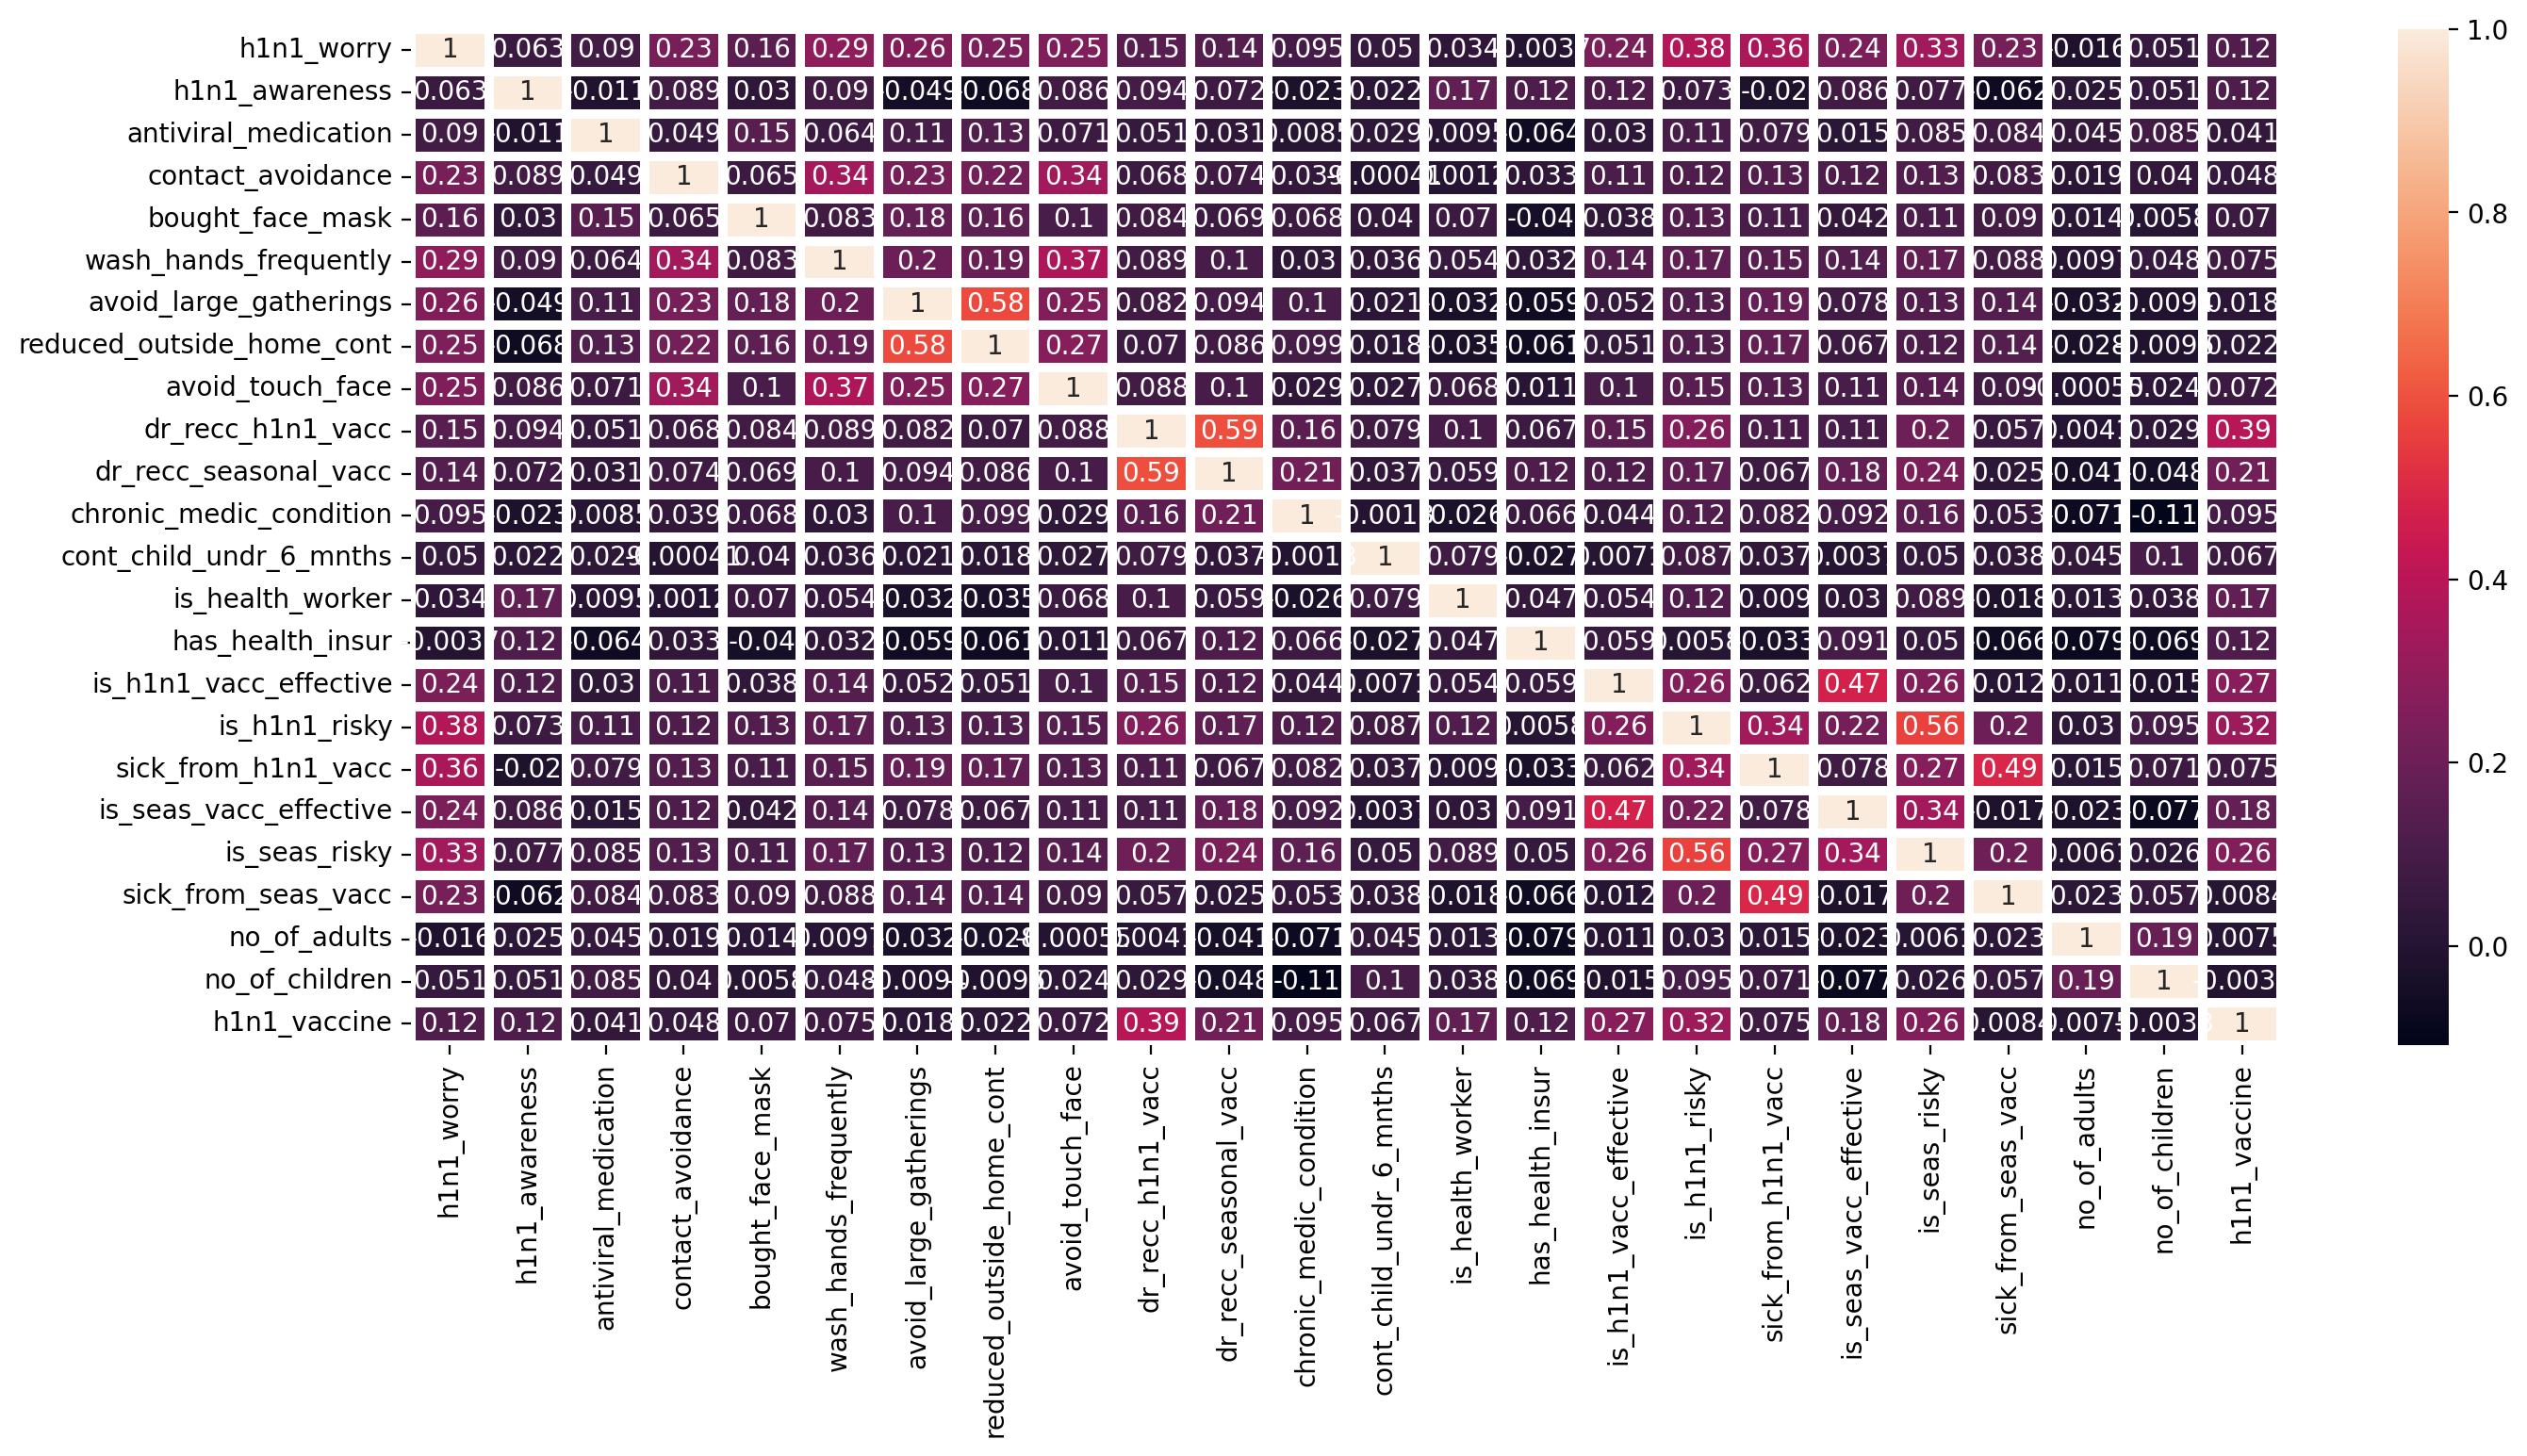

In [22]:
# correlation of numerical columns
num_corr = df[numerical_cols].corr()
plt.figure('figsize'==(10,10))
sns.heatmap(num_corr, annot=True,linewidths=3)
plt.show()

- Almost all the feature correlate positively with the target column, h1n1_vaccine
- dr_recc_h1n1_vacc, dr_recc_seasonal_vacc, is_health_worker and a few columns have high correlation with the h1n1_vaccine column

### Data Preprocessing

In [23]:
# replace missing values with most frequent data in each column
for col in df.columns:
    df[col]=df[col].replace(np.nan,df[col].mode()[0])

In [24]:
df.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

### Split the data into train and test set

In [25]:
X = df.drop(['h1n1_vaccine'],axis=1)
Y = df['h1n1_vaccine']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=43, stratify=Y)

In [27]:
# convert categorical values to numerical using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()

x_train =onehot.fit_transform(x_train)
x_test = onehot.transform(x_test)

In [28]:
x_train.shape

(21365, 99)

In [29]:
x_test.shape

(5342, 99)

In [63]:
# Evaluate the model
def evaluate_model(true,pred):
    accuracy = print('Accuracy:',accuracy_score(true,pred))
    cm = print(confusion_matrix(true,pred))
    ps= print('Precision_score:',precision_score(true,pred))
    
    return

## Building models

### Logistic Regression


In [64]:
logr =LogisticRegression()
logr.fit(x_train,y_train)
print('train_score:',logr.score(x_train,y_train))
print('test_score:',logr.score(x_test,y_test))
y_pred = logr.predict(x_test)
evaluate_model(y_test,y_pred)

train_score: 0.8355253919962555
test_score: 0.8418195432422314
Accuracy: 0.8418195432422314
[[3999  208]
 [ 637  498]]
Precision_score: 0.7053824362606232


### RandomForest Classifier

In [65]:
rf_model =RandomForestClassifier(criterion="log_loss",max_depth=9)
rf_model.fit(x_train,y_train)
print('train_score:',rf_model.score(x_train,y_train))
print('test_score:',rf_model.score(x_test,y_test))

y_pred = rf_model.predict(x_test)
evaluate_model(y_test,y_pred)

train_score: 0.8524221858179265
test_score: 0.8367652564582553
Accuracy: 0.8367652564582553
[[4051  156]
 [ 716  419]]
Precision_score: 0.7286956521739131


### AdaBoostingClassifier

In [32]:
ab_model =AdaBoostClassifier()
ab_model.fit(x_train,y_train)
print('train_score:',ab_model.score(x_train,y_train))
print('test_score:',ab_model.score(x_test,y_test))

train_score: 0.8336531710741868
test_score: 0.8408835642081617


### GradientBoostingClassifier

In [33]:
gb_model =GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
print('train_score:',gb_model.score(x_train,y_train))
print('test_score:',gb_model.score(x_test,y_test))

train_score: 0.8412356658085655
test_score: 0.8403219767877199


### BaggingClassifier

In [39]:
bg_model =BaggingClassifier(estimator=GradientBoostingClassifier())
bg_model.fit(x_train,y_train)
print('train_score:',bg_model.score(x_train,y_train))
print('test_score:',bg_model.score(x_test,y_test))

train_score: 0.8418909431312895
test_score: 0.8412579558217896


### SVC

In [43]:
svc_model =SVC(kernel='rbf')
svc_model.fit(x_train,y_train)
print('train_score:',svc_model.score(x_train,y_train))
print('test_score:',svc_model.score(x_test,y_test))

train_score: 0.85986426398315
test_score: 0.8420067390490453


### DecisionTree

In [54]:
tree_model =DecisionTreeClassifier(criterion="log_loss",max_depth=6)
tree_model.fit(x_train,y_train)
print('train_score:',tree_model.score(x_train,y_train))
print('test_score:',tree_model.score(x_test,y_test))

train_score: 0.8347765036274281
test_score: 0.8354548858105578
